[Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine) from the UCI ML Repository. 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
# min-max scaling -- normalizing data
dfn = df_wine.copy()
for i in dfn.columns[1:14]:
    min_val = min(dfn[i])
    max_val = max(dfn[i])
    
    for j in range(len(dfn[i])):
        dfn[i][j] = (dfn[i][j] - min_val)/(max_val - min_val)

#importing data into array
X = dfn.iloc[:,1:14].to_numpy()
Y = dfn.iloc[:,0].to_numpy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

In [31]:
## logistic regression
C = [0.5,1.0,1.5,2.0]
weights = []
for i in C:
    c = LogisticRegression(penalty = 'l1', C = i, random_state=0, solver = 'liblinear').fit(X_train, y_train)
    weights.append(c.coef_[1])

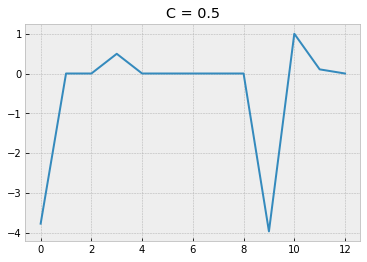

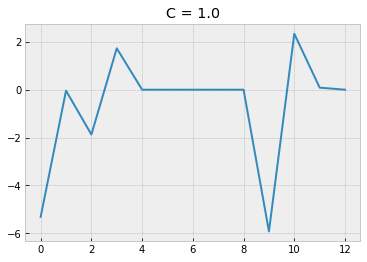

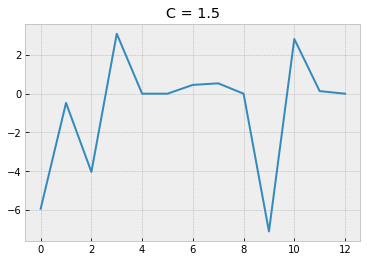

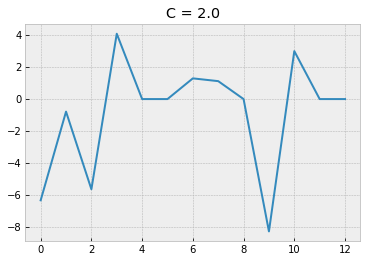

In [32]:
#plotting
k=0
for i in weights:
    plt.figure()
    plt.title("C = " + str(C[k]))
    k = k+1
    plt.plot(i)

In [34]:
c = LogisticRegression(penalty = 'l1', C = 0.5, random_state=0, solver = 'liblinear').fit(X_train, y_train)
print("Weights: ")
print(c.coef_)
print("Bias parameters:")
print(c.intercept_)

Weights: 
[[ 3.15292261  0.          0.         -3.25659201  0.          0.
   2.77278765 -0.97548246  0.          0.          0.          0.
   0.        ]
 [-3.77213719  0.          0.          0.49510043  0.          0.
   0.          0.          0.         -3.96760611  0.99901077  0.1040515
   0.        ]
 [ 0.          1.45938526  0.          0.          0.          0.
  -3.09357524  0.          0.          1.95690229  0.         -3.57525596
   0.        ]]
Bias parameters:
[-1.46511189  1.9676891   0.        ]


For label 2, the features selected are 
1. Alcohol
2. Alcalinity of ash
3. Color intensity
4. Hue
5. OD280/OD315 of diluted wines

In [35]:
pred_train = c.predict(X_train)
pred_test = c.predict(X_test)

print("Training accuracy = ")
print(accuracy_score(y_train,pred_train))
print("Test Accuracy = ")
print(accuracy_score(y_test,pred_test))

Training accuracy = 
0.9274193548387096
Test Accuracy = 
1.0


In [36]:
print("Confusion matrix for training data")
print(confusion_matrix(y_train,pred_train))
print("Confusion matrix for test data")
print(confusion_matrix(y_test,pred_test))

Confusion matrix for training data
[[42  3  0]
 [ 4 46  2]
 [ 0  0 27]]
Confusion matrix for test data
[[14  0  0]
 [ 0 19  0]
 [ 0  0 21]]
